In [67]:
!pip install sklearn

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [69]:
df = pd.read_csv("/Users/szombatiattila/Aliz/stock_predictor/bquxjob_122f8763_18404879d17.csv")

In [70]:
df.head(5)
df.isnull().values.any()

False

In [71]:
columns = [feature for feature in list(df.columns) if feature != 'diff_after_500']
training_df = df[columns]
predicting_df = df[['diff_after_500']]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = scaler.fit_transform(training_df)
scaled_predicting_set = scaler.fit_transform(predicting_df)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(scaled_training_set, scaled_predicting_set, test_size=.2)

In [73]:
y_test

array([[0.09312283],
       [0.11128189],
       [0.11516842],
       [0.10104958],
       [0.09518686],
       [0.09430855],
       [0.1223486 ],
       [0.11000834],
       [0.10566071],
       [0.10605595],
       [0.11062316],
       [0.11163322],
       [0.10871284],
       [0.11288481],
       [0.07913574],
       [0.10219138],
       [0.14160555],
       [0.10423345],
       [0.19959598],
       [0.09957841],
       [0.11872557],
       [0.10304774],
       [0.10469457],
       [0.12796979],
       [0.10741733],
       [0.10023714],
       [0.09913926],
       [0.10511176],
       [0.09929296],
       [0.09411093],
       [0.10214747],
       [0.07641298],
       [0.1020816 ],
       [0.09145404],
       [0.11642001],
       [0.10599008],
       [0.09536252],
       [0.10807606],
       [0.10500198],
       [0.10735146],
       [0.10212551],
       [0.09845857],
       [0.10449695],
       [0.09650433],
       [0.10047868],
       [0.11248957],
       [0.11018401],
       [0.102

In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [75]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [76]:
regressor.compile(optimizer="adam", loss="mean_squared_error")
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


2022-10-24 22:39:10.936894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:39:11.294014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:39:11.367211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:39:11.440943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:39:11.494860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:39:11.579395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:39:11.688171: I tensorflow/core/grappler/optimizers/cust

 1/65 [..............................] - ETA: 3:43 - loss: 0.0114

2022-10-24 22:39:11.820715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:39:11.921359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 6s 34ms/step - loss: 0.0011
Epoch 2/100
65/65 [==============================] - 2s 24ms/step - loss: 4.3869e-04
Epoch 3/100
65/65 [==============================] - 2s 25ms/step - loss: 4.4187e-04
Epoch 4/100
65/65 [==============================] - 2s 25ms/step - loss: 4.5499e-04
Epoch 5/100
65/65 [==============================] - 2s 25ms/step - loss: 4.3240e-04
Epoch 6/100
65/65 [==============================] - 2s 25ms/step - loss: 4.3259e-04
Epoch 7/100
65/65 [==============================] - 2s 25ms/step - loss: 4.3613e-04
Epoch 8/100
65/65 [==============================] - 2s 25ms/step - loss: 4.4200e-04
Epoch 9/100
65/65 [==============================] - 2s 25ms/step - loss: 4.4371e-04
Epoch 10/100
65/65 [==============================] - 2s 25ms/step - loss: 4.3554e-04
Epoch 11/100
65/65 [==============================] - 2s 25ms/step - loss: 4.2327e-04
Epoch 12/100
65/65 [==============================] - 2s 24ms/step - loss: 4.29

In [77]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price

2022-10-24 22:41:51.480824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:41:51.592538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:41:51.655474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 6/17 [=========>....................] - ETA: 0s 

2022-10-24 22:41:51.705512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:41:51.754414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 2s 13ms/step


array([[100.2694  ],
       [100.52935 ],
       [100.94982 ],
       [100.60642 ],
       [101.222824],
       [101.090065],
       [100.36989 ],
       [100.188576],
       [100.96879 ],
       [101.023026],
       [100.52743 ],
       [100.28339 ],
       [100.478966],
       [101.015854],
       [100.07257 ],
       [100.95861 ],
       [101.05067 ],
       [101.17846 ],
       [101.24409 ],
       [101.598404],
       [100.57261 ],
       [100.86052 ],
       [100.31759 ],
       [100.42476 ],
       [100.646935],
       [100.2463  ],
       [100.32041 ],
       [100.67207 ],
       [100.22597 ],
       [100.0228  ],
       [100.25647 ],
       [100.84057 ],
       [100.80948 ],
       [100.67114 ],
       [100.69242 ],
       [101.07939 ],
       [100.41973 ],
       [101.20489 ],
       [101.44333 ],
       [100.2411  ],
       [100.084595],
       [100.112175],
       [101.17243 ],
       [100.34121 ],
       [100.119446],
       [100.118095],
       [100.49189 ],
       [100.6

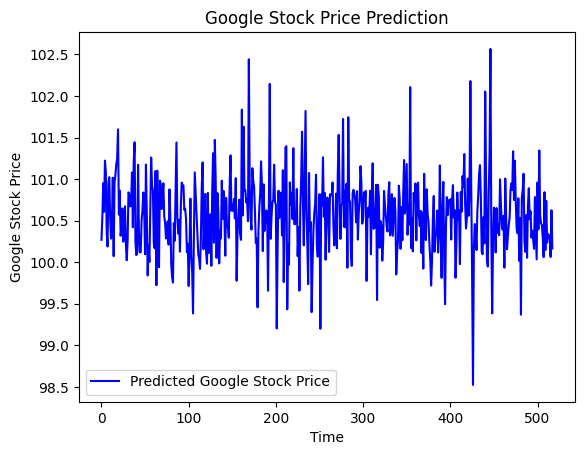

In [78]:
import matplotlib.pyplot as plt

plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

In [94]:
regressor.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [80]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")

# Let's check:
np.testing.assert_allclose(
    regressor.predict(X_test), reconstructed_model.predict(X_test)
)


17/17 [==============================] - 0s 10ms/step


2022-10-24 22:42:24.078889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:42:24.180677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:42:24.230796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-24 22:42:24.277155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/17 [==================>...........] - ETA: 0s

2022-10-24 22:42:24.320786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 1s 14ms/step


In [81]:
reconstructed_predict = reconstructed_model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(reconstructed_predict)
predicted_stock_price

17/17 [==============================] - 0s 10ms/step


array([[100.2694  ],
       [100.52935 ],
       [100.94982 ],
       [100.60642 ],
       [101.222824],
       [101.090065],
       [100.36989 ],
       [100.188576],
       [100.96879 ],
       [101.023026],
       [100.52743 ],
       [100.28339 ],
       [100.478966],
       [101.015854],
       [100.07257 ],
       [100.95861 ],
       [101.05067 ],
       [101.17846 ],
       [101.24409 ],
       [101.598404],
       [100.57261 ],
       [100.86052 ],
       [100.31759 ],
       [100.42476 ],
       [100.646935],
       [100.2463  ],
       [100.32041 ],
       [100.67207 ],
       [100.22597 ],
       [100.0228  ],
       [100.25647 ],
       [100.84057 ],
       [100.80948 ],
       [100.67114 ],
       [100.69242 ],
       [101.07939 ],
       [100.41973 ],
       [101.20489 ],
       [101.44333 ],
       [100.2411  ],
       [100.084595],
       [100.112175],
       [101.17243 ],
       [100.34121 ],
       [100.119446],
       [100.118095],
       [100.49189 ],
       [100.6

In [82]:
predict = regressor.predict(X_test)
stock_price = scaler.inverse_transform(predict)
stock_price

17/17 [==============================] - 0s 9ms/step


array([[100.2694  ],
       [100.52935 ],
       [100.94982 ],
       [100.60642 ],
       [101.222824],
       [101.090065],
       [100.36989 ],
       [100.188576],
       [100.96879 ],
       [101.023026],
       [100.52743 ],
       [100.28339 ],
       [100.478966],
       [101.015854],
       [100.07257 ],
       [100.95861 ],
       [101.05067 ],
       [101.17846 ],
       [101.24409 ],
       [101.598404],
       [100.57261 ],
       [100.86052 ],
       [100.31759 ],
       [100.42476 ],
       [100.646935],
       [100.2463  ],
       [100.32041 ],
       [100.67207 ],
       [100.22597 ],
       [100.0228  ],
       [100.25647 ],
       [100.84057 ],
       [100.80948 ],
       [100.67114 ],
       [100.69242 ],
       [101.07939 ],
       [100.41973 ],
       [101.20489 ],
       [101.44333 ],
       [100.2411  ],
       [100.084595],
       [100.112175],
       [101.17243 ],
       [100.34121 ],
       [100.119446],
       [100.118095],
       [100.49189 ],
       [100.6

In [110]:
predict = regressor.predict(X_test[[5]])
stock_price = scaler.inverse_transform(predict)
stock_price

1/1 [==============================] - 1s 544ms/step


array([[101.09006]], dtype=float32)

In [116]:
np.asarray(X_test[[5]].tolist())

array([[0.1426797 , 0.19790089, 0.01373001, 0.00564638, 0.01462169,
        0.0049353 , 0.05084751, 0.00753865, 0.02527747, 0.01529695]])

In [84]:
prediction = {'reposne': stock_price.item(0)}

In [85]:
prediction

{'reposne': 101.09005737304688}

In [109]:
from cloud_function.utils.cloud_storage import CloudStorageUtils

import gcsfs

source_path = 'my_model'

# with tarfile.open('predictor_model.tar.gz', "w:gz") as tar:
#     tar.add(source_path)
#
# storage = CloudStorageUtils()
# storage.save_data_to_cloud_storage(bucket_name='stock_predictor_bucket', file_name='predictor_model.tar.gz',
#                                    file='predictor_model.tar.gz')

fs = gcsfs.GCSFileSystem()
fs.put('my_model', 'stock_predictor_bucket', recursive=True)

get_model_from_gcs = keras.models.load_model('gs://stock_predictor_bucket/my_model')

# with tarfile.open("/Users/szombatiattila/Aliz/stock_predictor/predictor_model.tar.gz") as file:
#     file.extractall()